In [88]:
#Loading Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Files

In [89]:
#Loading both datasets into respective DFs
df_MS = pd.read_csv('../../data/MS MARCO/data/MS_MARCO_64_Sample.csv')
df_SQuAD = pd.read_csv('../../data/SQuAD/data/SQuAD_64_QA.csv')
df_SQuAD_context = pd.read_csv('../../data/SQuAD/data/SQuAD_64_Context.csv')

### Curating Context

In [90]:
df_MS.head()

,question,context,answers
0,"who introduced modern methods of surgery, such...","[""The widespread introduction of antiseptic su...",Joseph Lister
1,president adams,['Save president adams cb radio to get e-mail ...,John Quincy Adams was an American statesman wh...
2,define semitic,['Anti-Semitism is a certain perception of Jew...,A member of any of a number of peoples of anci...
3,what is wudfhost service,['WUDFHost.exe errors can be related to corrup...,It is a set of Microsoft tools that aid in the...
4,what is an overactive pancreas,"[""An overactive pancrease would produce more e...",An overactive pancrease would produce more enz...


In [91]:
df_SQuAD_context.head()

,Context
0,The Amazon rainforest (Portuguese: Floresta Am...
1,Jacksonville is the largest city by population...
2,The 1973 oil crisis began in October 1973 when...
3,"In the modern industrialized world, constructi..."
4,Moderate and reformist Islamists who accept an...


In [92]:
# Add markers for visualisation
df_SQuAD_context['dataset'] = "SQuAD"
df_MS['dataset'] = "MS MARCO"

# Make columns name align with main dataset
df_SQuAD_context.rename(columns={'Context':'context'}, inplace=True)

# Concatenate both context dataframes
df_context = pd.concat([df_MS[['context', 'dataset']], df_SQuAD_context[['context', 'dataset']]], axis=0)

#df_context.to_csv('../../data/MainDataset/data/Context.csv', index=False)

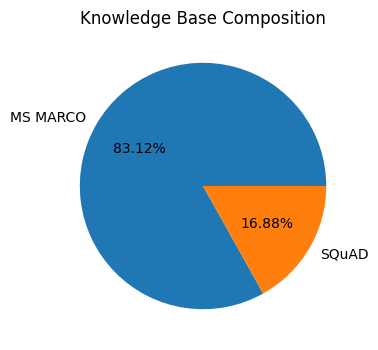

In [93]:
plt.figure(figsize=(4,4))  
plt.pie(df_context['dataset'].value_counts().values, 
        labels=df_context['dataset'].value_counts().index,autopct='%.2f%%')  
plt.title('Knowledge Base Composition')  
plt.show()

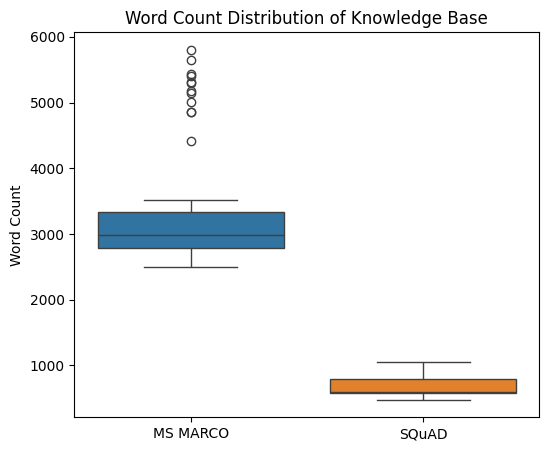

In [94]:
df_vis = pd.DataFrame({"MS MARCO": df_context[df_context['dataset'] == 'MS MARCO']['context'].str.len(),
                       "SQuAD" :  df_context[df_context['dataset'] == 'SQuAD']['context'].str.len()})
plt.figure(figsize=(6,5))
sns.boxplot(df_vis)
plt.title('Word Count Distribution of Knowledge Base')
plt.ylabel('Word Count')
plt.show()


### Combining Questions

In [95]:
# Reformat columns
# Remove context column on MS MARCO
df_MS.drop(columns=['context'], inplace=True)

# Rename Columns
df_SQuAD.rename(columns={'Question':'question', 'Answer':'answers'}, inplace=True)

In [96]:
df_qa = pd.concat([df_MS, df_SQuAD], axis=0) # Join both by concatenation
df_qa.reset_index(drop=True,inplace=True) # Reset question index

In [113]:
df_qa

,question,answers,dataset
0,"who introduced modern methods of surgery, such...",Joseph Lister,MS MARCO
1,president adams,John Quincy Adams was an American statesman wh...,MS MARCO
2,define semitic,A member of any of a number of peoples of anci...,MS MARCO
3,what is wudfhost service,It is a set of Microsoft tools that aid in the...,MS MARCO
4,what is an overactive pancreas,An overactive pancrease would produce more enz...,MS MARCO
...,...,...,...
123,Vice President Agnew describes Civil disobedie...,"['muggers, arsonists, draft evaders, campaign ...",SQuAD
124,Civil disobedience has been argued in more rec...,"['ambiguity', 'debased', 'ambiguity', 'ambigui...",SQuAD
125,What person argues that civil disobedience is ...,"['Marshall Cohen', 'Marshall Cohen', 'Marshall...",SQuAD
126,"In modern times, what is said about civil diso...","['become utterly debased', 'utterly debased', ...",SQuAD


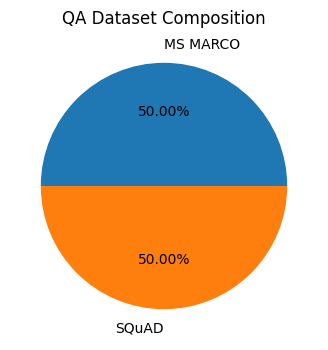

In [122]:
plt.figure(figsize=(4,4))  
plt.pie(df_qa['dataset'].value_counts().values, 
        labels=df_qa['dataset'].value_counts().index,autopct='%.2f%%',labeldistance=1.15)  
plt.title('QA Dataset Composition')  
plt.show()

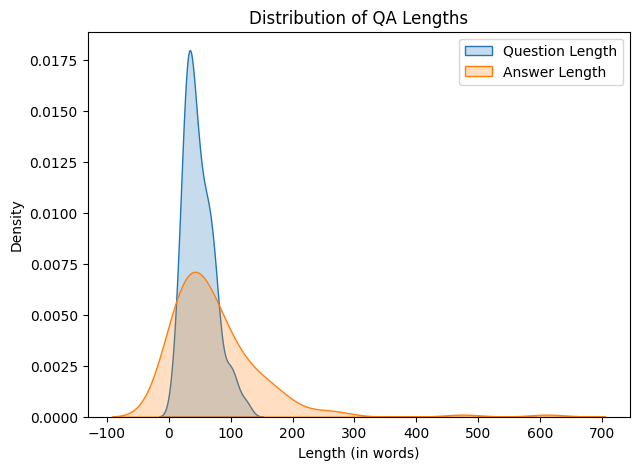

In [133]:
plt.figure(figsize=(7,5))
sns.kdeplot(df_qa['question'].str.len(), label='Question Length', fill=True)
sns.kdeplot(df_qa['answers'].str.len(), label='Answer Length', fill=True)
plt.title('Distribution of QA Lengths')
plt.xlabel('Length (in words)')
plt.legend()
plt.show()

In [98]:
#df_qa.to_csv('../../data/MainDataset/data/QA.csv', index=False)